# 파이썬으로 영상 I/O 및 표시

In [7]:
# 라이브러리 import
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show
from skimage import color, viewer, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import random_noise
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy import misc

## PIL을 사용해 영상 읽기, 저장 및 표시


In [8]:
im = Image.open("./images/parrot.png")
print(im.width, im.height, im.format, type(im)) # 이미지의 정보 
im.show() # 영상 표시

453 340 PNG <class 'PIL.PngImagePlugin.PngImageFile'>


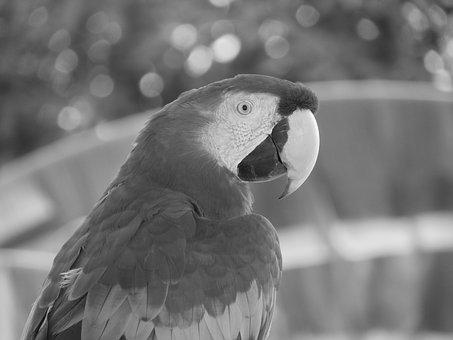

In [10]:
im_g = im.convert('L') # 컬러 영상 명암도 영상으로 변경
im_g.save('./images/parrot_gray.png')
Image.open('./images/parrot_gray.png')

## Matplotlib 사용해 영상 읽기, 저장 및 표시

(960, 1280, 4) float32 <class 'numpy.ndarray'>


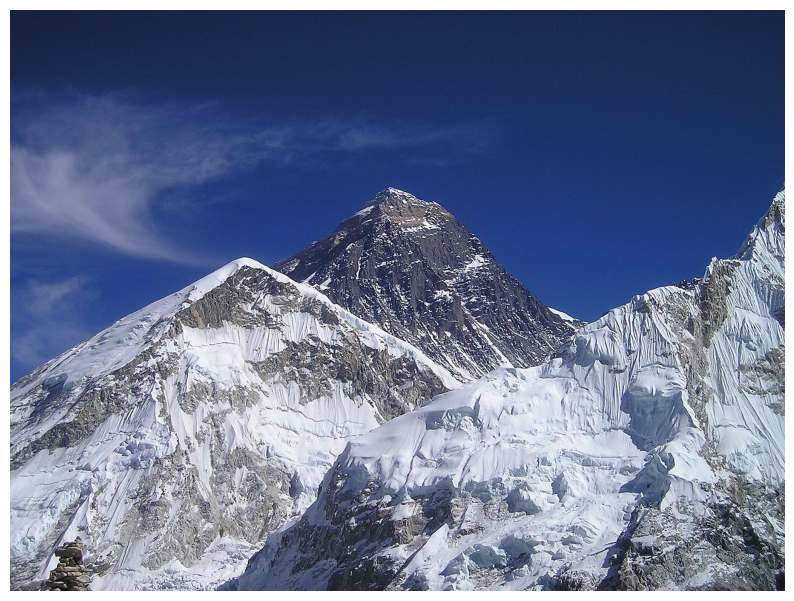

In [11]:
im = mpimg.imread("./images/hill.png")
print(im.shape, im.dtype, type(im))

plt.figure(figsize=(10,10)) # 이미지 표시 사이즈
plt.imshow(im), plt.axis('off') # 축 표시  off
plt.show()

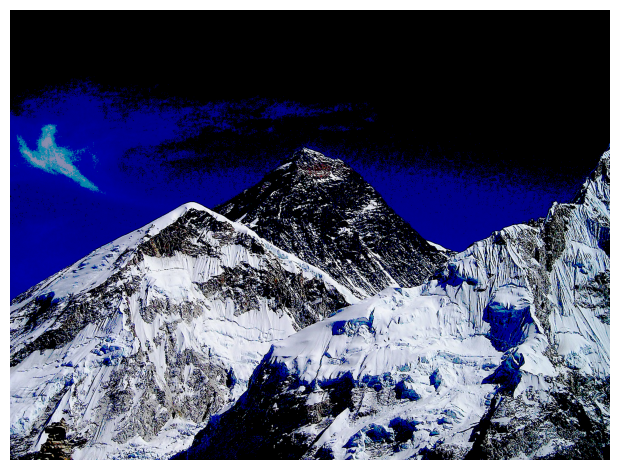

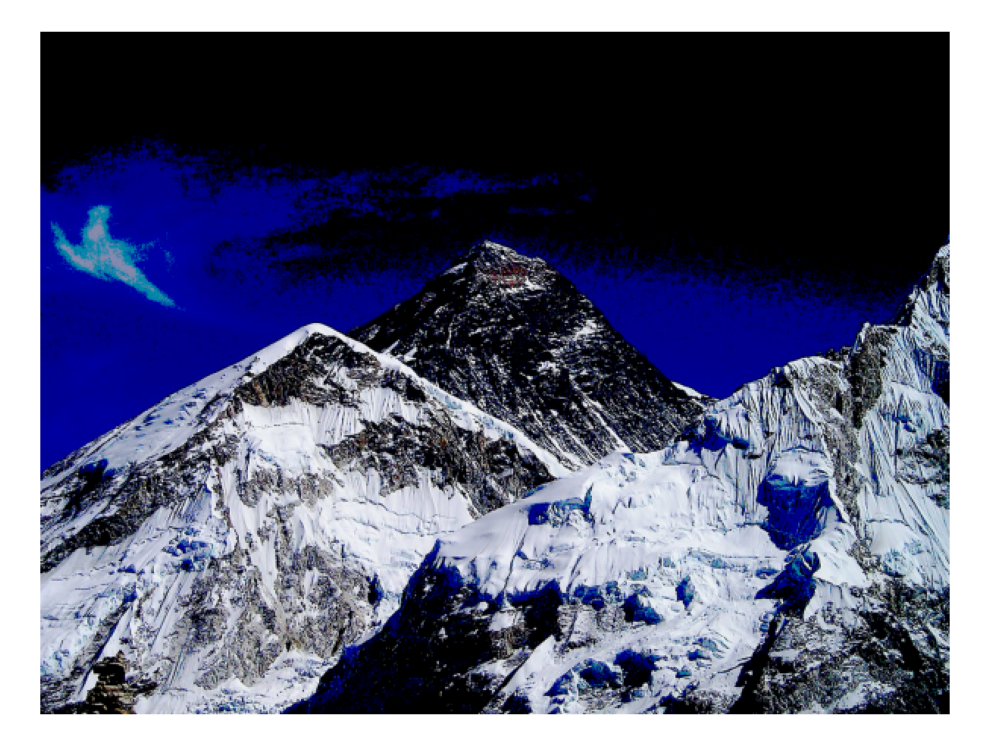

In [14]:
im1 = im
im1[im1 < 0.5] = 0 # 어두운 영상 생성

plt.imshow(im1)
plt.axis('off')
plt.tight_layout()
plt.savefig('./images/hill_dark.png')

im = mpimg.imread('./images/hill_dark.png')
plt.figure(figsize=(10,10))
plt.imshow(im), plt.axis('off'), plt.tight_layout()
plt.show()

# lena 이미지로 보간 

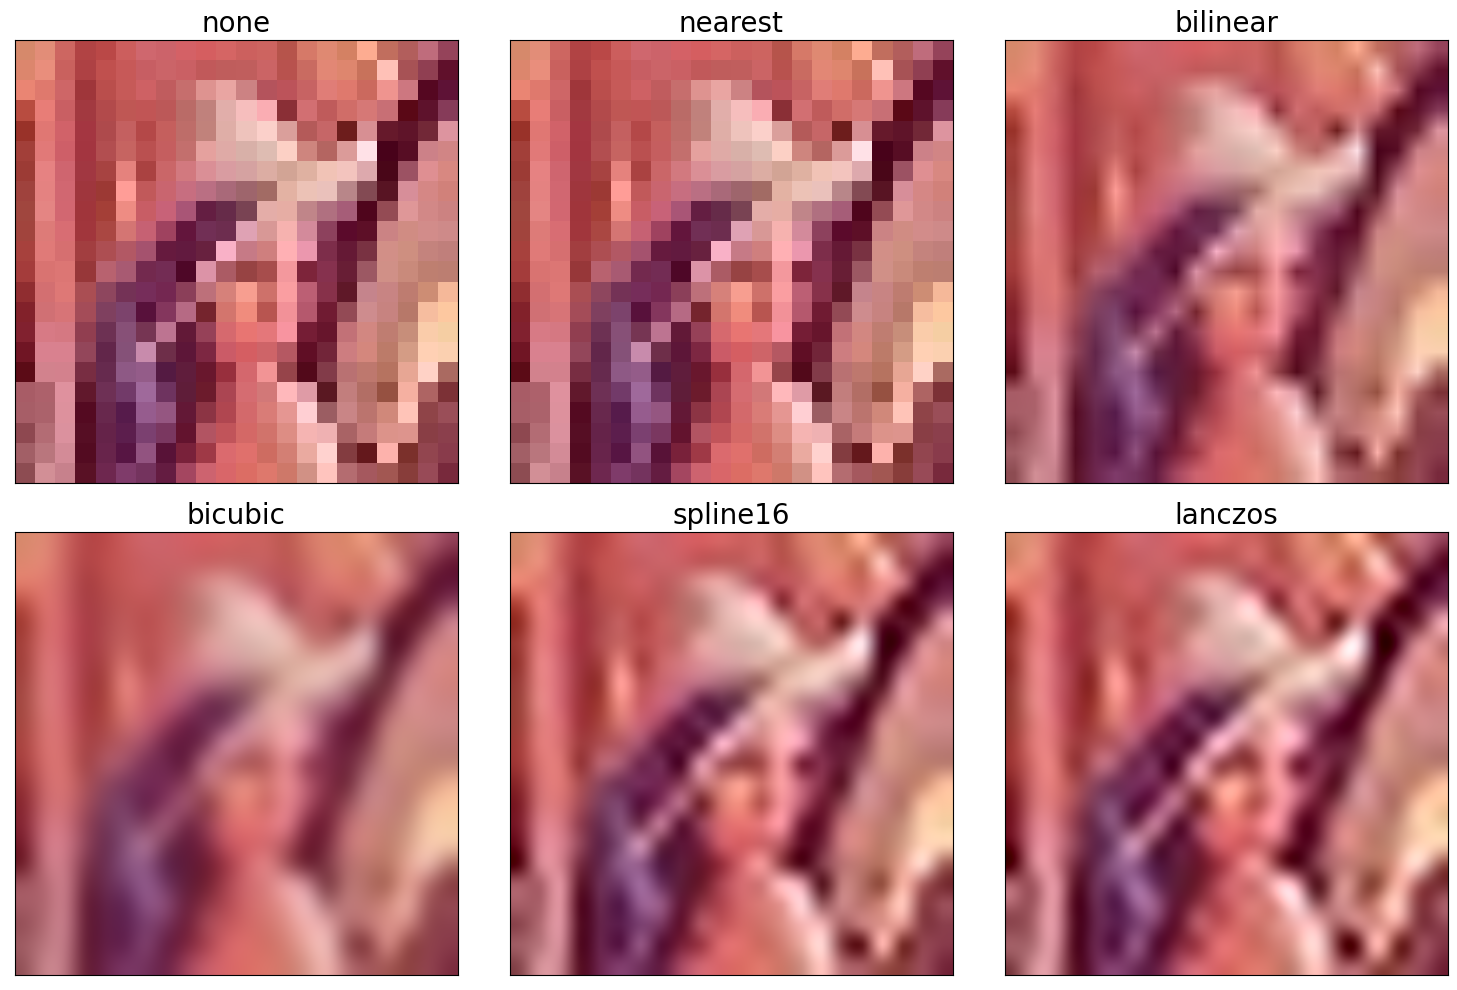

In [21]:
im = mpimg.imread('./images/lena_small.jpg')
methods = ['none','nearest', 'bilinear','bicubic','spline16','lanczos'] # 보간 방법들

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10), subplot_kw={'xticks' : [], 'yticks' : []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for ax, interp_method in zip(axes.flat, methods):
    ax.imshow(im, interpolation=interp_method)
    ax.set_title(str(interp_method), size=20)

plt.tight_layout()
plt.show()